In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline


In [92]:
all_data = pd.read_csv("LendingClub_LoanStats3a_v2.csv")

C:\Users\joseph.robie\Dropbox\Ongoing_Learning\Thinkful\Anaconda3.5\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First Analysis-->
Hypothesis – On average, larger loans, and also more loans, are given to customers with longer employment histories, home ownership, higher annual income, shorter term, a “verified” verification status, a small business purpose, and a higher “grade” rating.

Key Questions to Test: What is the breakout in loan size and number of loans given to customers by employment history length, home ownership, annual income, term, verification status, purpose, and grade?  Also, what is the size of the loan provided at each two-percentage point interest rate tier?

Key Takeaway: This chart indicates that smaller total loans are given out to customers as their work history grows.  The largest total laons are made to people with 10+ years of work experience because it is a "catch all" category that includes the largest number of people.


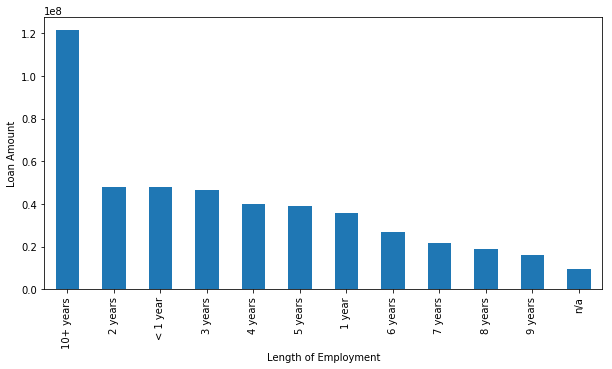

In [4]:
all_data.groupby("emp_length").loan_amnt.sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Loan Amount")
plt.xlabel("Length of Employment")

message = "Key Takeaway: This chart indicates that smaller total loans are given out to customers as their work history grows.  The largest total laons are made to people with 10+ years of work experience because it is a \"catch all\" category that includes the largest number of people."
print(message)

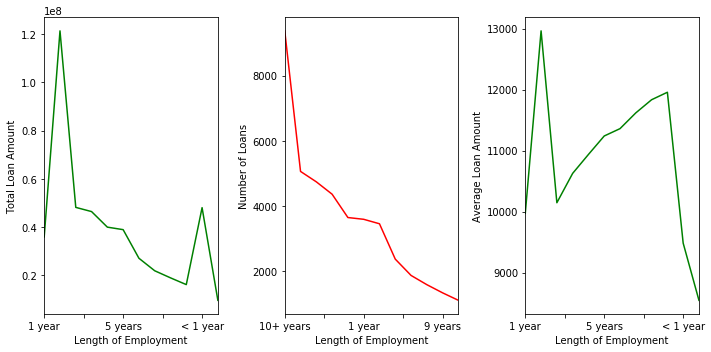

Key Takeaway: This chart indicates that a fewer number of loans are given out to customers as their work history grows.  The largest total laons are made to people with 10+ years of work experience because it is a "catch all" category that includes the largest number of people.


In [37]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
all_data.groupby("emp_length").loan_amnt.sum().plot(kind = "line", color = "green")
plt.ylabel("Total Loan Amount")
plt.xlabel("Length of Employment")

plt.subplot(1,3,2)
all_data.emp_length.value_counts().plot(kind = "line", color = "red")
plt.ylabel("Number of Loans")
plt.xlabel("Length of Employment")

plt.subplot(1,3,3)
all_data.groupby("emp_length").loan_amnt.mean().plot(kind = "line", color = "green")
plt.ylabel("Average Loan Amount")
plt.xlabel("Length of Employment")

plt.tight_layout()
plt.show()

message = "Key Takeaway: This chart indicates that a fewer number of loans are given out to customers as their work history grows.  The largest total laons are made to people with 10+ years of work experience because it is a \"catch all\" category that includes the largest number of people."
print(message)

In [14]:
my_new_array = pd.array([[all_data.groupby("emp_length").loan_amnt.sum()],[all_data.groupby("emp_length").value_counts()]
df = pd.DataFrame(my_new_array)
df.index = ["Total Loan Amount in Each Emp Length", "Number of Loans in Each Emp Length"]
df["Average Loan For Each Length of Employment"] = df["Total Loan Amount in Each Emp Length"] / df["Number of Loans in Each Emp Length"]
all_data.groupby("emp_length").all_data["Average Loan Size"].sum().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Length of Employment")

# Need to get back to this.

SyntaxError: invalid syntax (<ipython-input-14-bd9389c31a9d>, line 2)

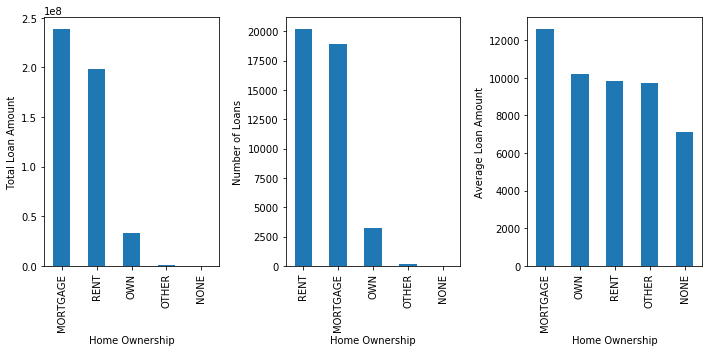

Key Takeaway: This chart indicates that, on average, the largest loans are made to people with mortgages followed closely by people who own homes.


In [43]:
plt.subplot(1,3,1)
all_data.groupby("home_ownership").loan_amnt.sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Home Ownership")

plt.subplot(1,3,2)
all_data.home_ownership.value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Home Ownership")

plt.subplot(1,3,3)
all_data.groupby("home_ownership").loan_amnt.mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Home Ownership")

plt.tight_layout()
plt.show()

message = "Key Takeaway: This chart indicates that, on average, the largest loans are made to people with mortgages followed closely by people who own homes."
print(message)
# HOW DO I SORT THE BAR GRAPH BELOW??  THE sort_values("home_ownership") is not working.

Income Categories
(0, 20000]             3869.080882
(20000, 40000]         7358.302079
(40000, 60000]        10066.184317
(60000, 80000]        12315.438271
(80000, 100000]       13949.909856
(100000, 120000]      15205.469969
(120000, 150000]      16393.950517
(150000, 200000]      17921.579961
(200000, 10000000]    18986.496350
Name: loan_amnt, dtype: float64
Key Takeaway: This chart indicates that, on average, the largest loans are made to people with higher annual income.


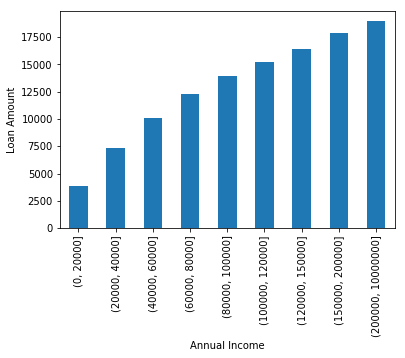

In [58]:
df = pd.DataFrame(all_data)

bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 150000, 200000, 10000000]
df["Income Categories"] = pd.cut(df["annual_inc"], bins)
print(df.groupby("Income Categories")["loan_amnt"].mean())

df.groupby("Income Categories")["loan_amnt"].mean().plot(kind="bar")

plt.ylabel("Loan Amount")
plt.xlabel("Annual Income")

message = "Key Takeaway: This chart indicates that, on average, the largest loans are made to people with higher annual income."
print(message)

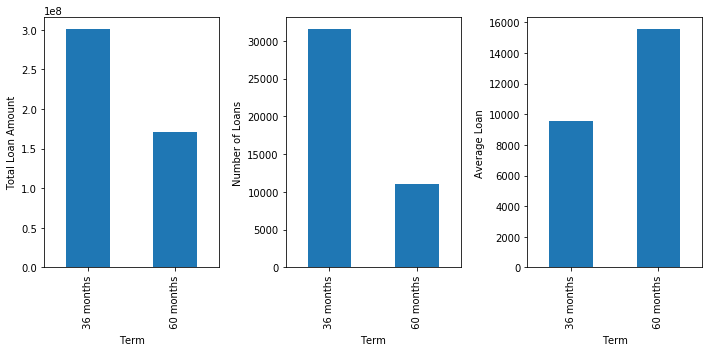

Key Takeaway: This chart indicates that while the total amount of loans provided were higher for 36 month periods rather than 60 month period, the average loan was higher for 60 months since fewer loans were made in this term period overall.


In [59]:
plt.subplot(1,3,1)
all_data.groupby("term").loan_amnt.sum().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Term")

plt.subplot(1,3,2)
all_data.term.value_counts().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Term")

plt.subplot(1,3,3)
all_data.groupby("term").loan_amnt.mean().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan")
plt.xlabel("Term")

plt.tight_layout()
plt.show()

message = "Key Takeaway: This chart indicates that while the total amount of loans provided were higher for 36 month periods rather than 60 month period, the average loan was higher for 60 months since fewer loans were made in this term period overall."
print(message)

Key Takeaway: This chart indicates that the average loan was highest for to individuals where the source was verified.


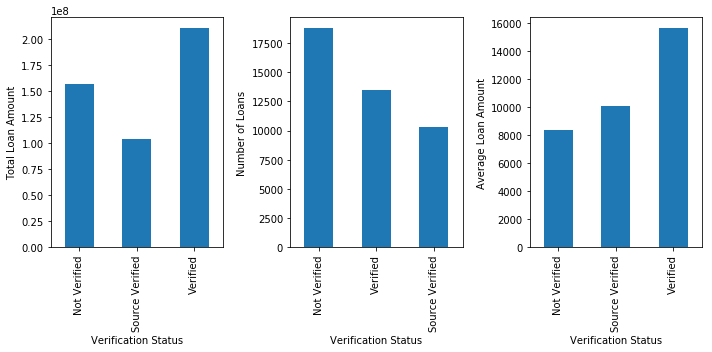

In [60]:
plt.subplot(1,3,1)
all_data.groupby("verification_status").loan_amnt.sum().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Verification Status")

plt.subplot(1,3,2)
all_data.verification_status.value_counts().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Verification Status")

plt.subplot(1,3,3)
all_data.groupby("verification_status").loan_amnt.mean().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Verification Status")

plt.tight_layout()
plt.plot()

message = "Key Takeaway: This chart indicates that the average loan was highest for to individuals where the source was verified."
print(message)

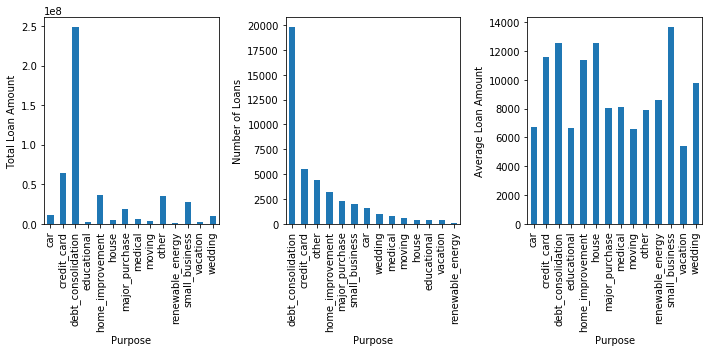

Key Takeaway: This chart indicates that the average loan was highest for small business loans. Another interesting note is that the most loans were made for the purpose of debt consolidation, indicating that most people turn to LendingClub to help clean up their financial situation.


In [62]:
plt.subplot(1,3,1)
all_data.groupby("purpose").loan_amnt.sum().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Purpose")

plt.subplot(1,3,2)
all_data.purpose.value_counts().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Purpose")

plt.subplot(1,3,3)
all_data.groupby("purpose").loan_amnt.mean().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Purpose")

plt.tight_layout()
plt.show()

message = "Key Takeaway: This chart indicates that the average loan was highest for small business loans. Another interesting note is that the most loans were made for the purpose of debt consolidation, indicating that most people turn to LendingClub to help clean up their financial situation."
print(message)

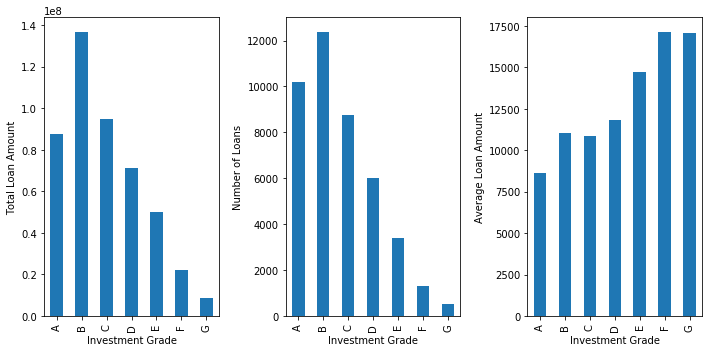

Key Takeaway: This chart indicates that the average loan size was highest for the F and G-rated investment loans and that the average loan size generally increases from A - G. Also of note, the total number of loans made as well as the sum of all loans made generally decreased from the highest investment grades to the lowest ones.


In [64]:
plt.subplot(1,3,1)
all_data.groupby("grade").loan_amnt.sum().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Investment Grade")

plt.subplot(1,3,2)
all_data.grade.value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Investment Grade")

plt.subplot(1,3,3)
all_data.groupby("grade").loan_amnt.mean().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Investment Grade")

plt.tight_layout()
plt.show()

message = "Key Takeaway: This chart indicates that the average loan size was highest for the F and G-rated investment loans and that the average loan size generally increases from A - G. Also of note, the total number of loans made as well as the sum of all loans made generally decreased from the highest investment grades to the lowest ones."
print(message)

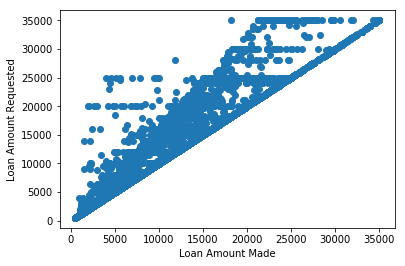

Key Takeaway: This chart, which shows the relationahip between loan amount requested and the loan amount provided indicates some heteroskedasticity, meaning the one variable is not a good predictor of the other.


In [142]:
plt.scatter(x=all_data.funded_amnt, y=all_data.loan_amnt)
plt.xlabel("Loan Amount Made")
plt.ylabel("Loan Amount Requested")
plt.show()
            
message = "Key Takeaway: This chart, which shows the relationahip between loan amount requested and the loan amount provided indicates some heteroskedasticity, meaning the one variable is not a good predictor of the other."
print(message)

Second Analysis-->
Hypothesis – Loans made to people with lower credit ratings are more likely to default.

Question 2: What is the relationship between loan status, grade, and sub grade?  Furthermore, what is the charge off rate per purpose and/title of use for each consumer?  Any relationship between charge off amount and state?

grade
A     602
B    1433
C    1356
D    1130
E     725
F     323
G     101
Name: Number of Charge Offs, dtype: int64
Key Takeaway: This chart indicates that the highest number of laon charge offs occured for people of the "B" investment grade.


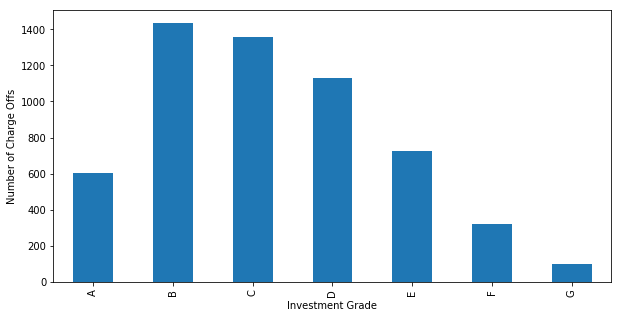

In [137]:
df = pd.DataFrame(all_data)

df.groupby("grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count()).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Charge Offs")
plt.xlabel("Investment Grade")

new_dataframe = pd.DataFrame()
new_dataframe["Number of Charge Offs"] = df.groupby("grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count())
print(new_dataframe["Number of Charge Offs"])
                                                                                            
message = "Key Takeaway: This chart indicates that the highest number of laon charge offs occured for people of the \"B\" investment grade."
print(message)

#QUESTION: How do I add another graph that shows the ratio of total charge offs in each investment grade 
#  by the amount of loans made in each of those investment grade categories??  ********

Key Takeaway: This chart indicates that the average loan was highest for G-rated investment loans and that the average loan size generally increases from A - G.


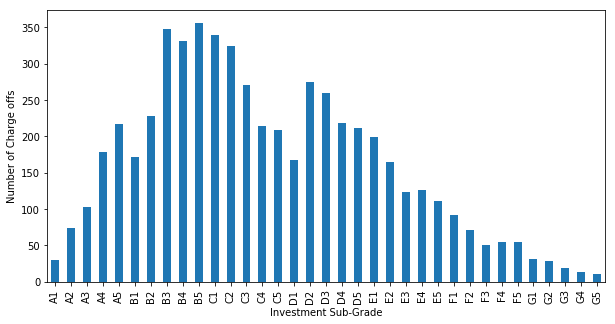

In [141]:
all_data.groupby("sub_grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count()).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Charge offs")
plt.xlabel("Investment Sub-Grade")

message = "Key Takeaway: The largest number of \"Charge Offs\" occured in the investment sub-grade level of B3-C2 indicating that this is the riskiest group."
print(message)

Third Analysis-->

Hypothesis – More loans are made during the fourth quarter of October, November, and December since it falls during the holiday season.

Key Question to Test: Is there any seasonality in the data (note, all data is from 2017)?

Key Takeaway: This chart indicates that more loans are made toward the end of the year as the holiday seasons approach.
month
1     27606650
2     27735425
3     32443425
4     32566000
5     34008300
6     36454075
7     38355050
8     40775800
9     43888100
10    48619900
11    51736500
12    57512125
Name: loan_amnt, dtype: int64


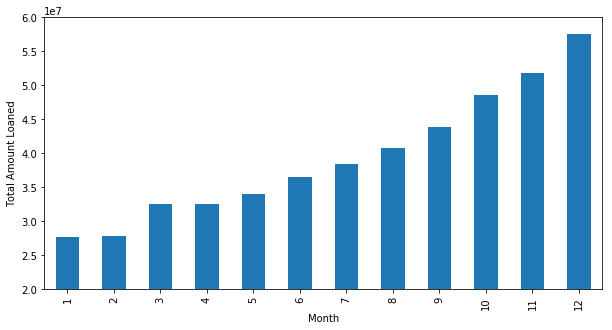

In [66]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

unique_months = all_data["month"].dt.month

all_data.groupby(all_data["month"].dt.month).loan_amnt.sum().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Amount Loaned")
plt.ylim(20000000, 60000000)
plt.xlabel("Month")

message = "Key Takeaway: This chart indicates that more loans are made toward the end of the year as the holiday seasons approach."
print(message)
#NEED TO SORT THIS GRAPH.
#sort_index(ascending=False).

print(all_data.groupby(all_data["month"].dt.month).loan_amnt.sum().sort_index())
#This prints all the months from the all_data["month"] column.

The code below is simply scratch work for answering the "third analysis."

In [54]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

print(all_data["month"].loc[0:10])
#This prints all the date information using the datetime function in pandas.

0    1900-12-11
1    1900-12-11
2    1900-12-11
3    1900-12-11
4    1900-12-11
5    1900-12-11
6    1900-12-11
7    1900-12-11
8    1900-12-11
9    1900-12-11
10   1900-12-11
Name: month, dtype: datetime64[ns]


In [30]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

print(all_data["month"].dt.month)
#This prints all the months from the all_data["month"] column.

0        12
1        12
2        12
3        12
4        12
5        12
6        12
7        12
8        12
9        12
10       12
11       12
12       12
13       12
14       12
15       12
16       12
17       12
18       12
19       12
20       12
21       12
22       12
23       12
24       12
25       12
26       12
27       12
28       12
29       12
         ..
42505     7
42506     7
42507     7
42508     7
42509     7
42510     7
42511     7
42512     6
42513     6
42514     6
42515     6
42516     6
42517     6
42518     6
42519     6
42520     6
42521     6
42522     6
42523     6
42524     6
42525     6
42526     6
42527     6
42528     6
42529     6
42530     6
42531     6
42532     6
42533     6
42534     6
Name: month, Length: 42535, dtype: int64


In [45]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

print(all_data["month"].dt.month.value_counts().sort_index())
#This prints all the total number of laons made in each month.

1     2616
2     2588
3     3002
4     3067
5     3167
6     3494
7     3694
8     3729
9     3873
10    4181
11    4439
12    4685
Name: month, dtype: int64
